# Engr421
## Homework 4
## Ata Sayın, 64437

In [509]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Data

In [510]:
data_set=np.genfromtxt("hw04_data_set.csv",delimiter=",",skip_header=1)
X=data_set[:,0]
Y=data_set[:,1]

In [511]:
xtrain=X[:100]
xtest=X[100:133]

In [512]:
ytrain=Y[:100]
ytest=Y[100:133]

## Regressogram

In [513]:
xMax=np.max(X)
xMin=np.min(X) if np.min(X) < 0 else 0
xline=np.linspace(xMin,xMax,1600)
h=3#bin width

In [514]:
leftBoundaries=np.arange(xMin,xMax,h)
rightBoundaries=np.arange(xMin+h,xMax+h,h)
numberOfBins=leftBoundaries.shape[0]

In [515]:
y_hat=[ytrain[(leftBoundaries[b]<xtrain) & (rightBoundaries[b]>=xtrain)] for b in range(numberOfBins)]
g1=[np.mean(y_hat[b]) for b in range(numberOfBins)]

## Plot

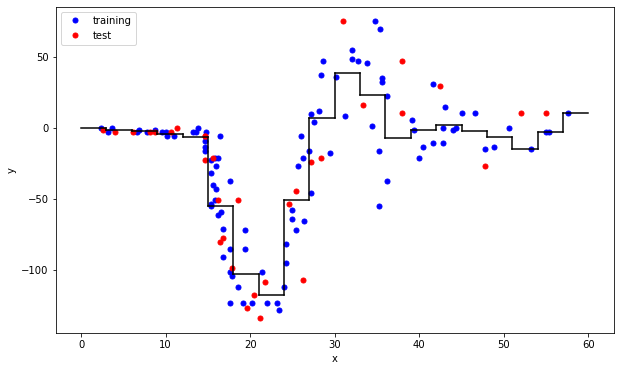

In [516]:
plt.figure(figsize = (10, 6))
plt.plot(xtrain,ytrain,".b",markersize=10,label="training")
plt.plot(xtest,ytest,".r",markersize=10,label="test")
for b in range(numberOfBins):
    plt.plot([leftBoundaries[b], rightBoundaries[b]], [g1[b], g1[b]], "k-")
for b in range(numberOfBins - 1):
    plt.plot([rightBoundaries[b], rightBoundaries[b]], [g1[b], g1[b + 1]], "k-")  
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## RMSE of Regressogram

In [517]:
count=np.asarray([np.sum((leftBoundaries[b]<xtest) & (rightBoundaries[b]>=xtest)) for b in range(numberOfBins)])
RMSE=np.sqrt(
    np.sum(
        (ytest[np.argsort(xtest)]
        -np.concatenate([np.repeat(g1[b],count[b]) for b in range(numberOfBins)])
        )**2
            
        /ytest.shape[0]))

round(RMSE,4)

24.726

## Running Mean Smoother

In [518]:
h=3
xline=np.linspace(h*0.5,xMax,1601)
y_hat=[ytrain[((x - 0.5 * h) < xtrain) & (xtrain <= (x + 0.5 * h))] for x in xline]
g2line=np.array([np.mean(y_hat[x]) for x in range(1601)])

## Plot

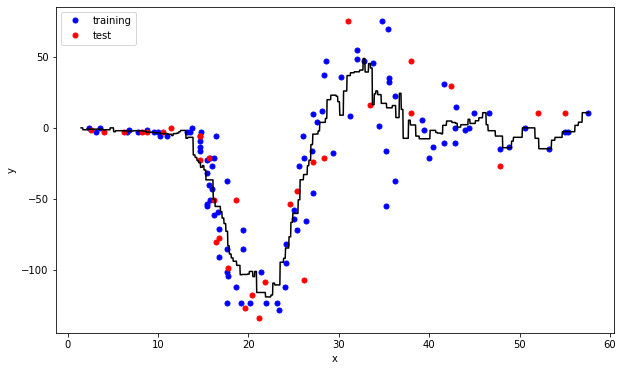

In [519]:
plt.figure(figsize = (10, 6))
plt.plot(xtrain,ytrain,".b",markersize=10,label="training")
plt.plot(xtest,ytest,".r",markersize=10,label="test")

plt.plot(xline,g2line, "k-") 

plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## RMSE of RMS

In [520]:
g2=np.asarray([np.mean(ytrain[((x - 0.5 * h) < xtrain) & (xtrain <= (x + 0.5 * h))]) for x in xtest])

RMSE=np.sqrt(
    np.sum(
        (ytest
        -g2
        )**2
            
        /ytest.shape[0]))

round(RMSE,4)

23.8403

## Kernel Smoother

In [521]:
h=1
xline=np.linspace(h*0.5,xMax,1601)
y_hat = np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - xtrain)**2 / h**2)*ytrain)/
                   np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - xtrain)**2 / h**2))
                    for x in xline])
g3line=y_hat

## Plot

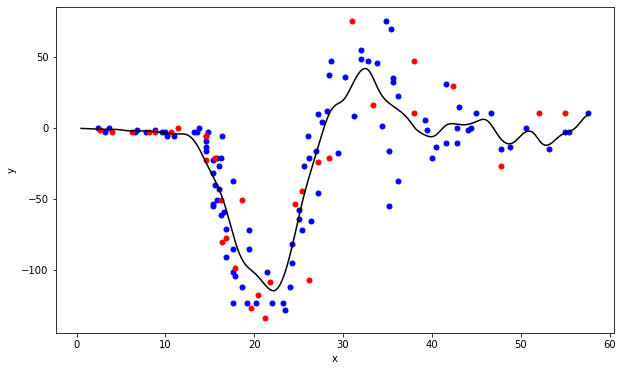

In [522]:
plt.figure(figsize = (10, 6))
plt.plot(xtrain,ytrain,".b",markersize=10,label="training")
plt.plot(xtest,ytest,".r",markersize=10,label="test")

plt.plot(xline, g3line, "k-")

plt.xlabel("x")
plt.ylabel("y")
plt.show()

## RMSE of Kernel Smoother

In [523]:
g3 = np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - xtrain)**2 / h**2)*ytrain)/
                   np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - xtrain)**2 / h**2))for x in xtest]) 

RMSE=np.sqrt(
    np.sum(
        (ytest
        -g3
        )**2
            
        /ytest.shape[0]))

round(RMSE,4)

24.1672